<a href="https://colab.research.google.com/github/S-r-e-e-V/SNA_Project/blob/main/SNA_Crypto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# unused code
import pandas as pd
from binance.client import Client
from binance.enums import *

# Enter your Binance API key and secret here
api_key = 'ENTER_YOUR_API_KEY_HERE'
api_secret = 'ENTER_YOUR_API_SECRET_HERE'

# Connect to the Binance client
client = Client(api_key, api_secret)

# Define the symbol and interval for the candlestick data
symbol = 'BTCUSDT'
interval = Client.KLINE_INTERVAL_1HOUR

# Retrieve the candlestick data
candles = client.futures_klines(symbol=symbol, interval=interval)

# Convert the data to a Pandas DataFrame
df = pd.DataFrame(candles, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume', 'close_time', 'quote_asset_volume', 'num_trades', 'taker_buy_base_asset_volume', 'taker_buy_quote_asset_volume', 'ignored'])

# Convert the timestamp to a datetime object
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')

# Set the timestamp as the index
df.set_index('timestamp', inplace=True)

print(df.head())


ModuleNotFoundError: ignored

In [49]:
pip install cbpro

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [50]:
import cbpro
import pandas as pd
import datetime

In [51]:

public_client = cbpro.PublicClient()


# start_date = pd.Timestamp('2022-03-25')
# end_date = pd.Timestamp('2023-03-25')
start_date = datetime.datetime(2022, 1, 1)
end_date = datetime.datetime(2022, 5, 1)
delta = pd.Timedelta('1 day')
dates = pd.date_range(start_date, end_date, freq=delta).to_pydatetime().tolist()

# print(public_client.get_product_historic_rates("BTC-USD"));

df = pd.DataFrame(public_client.get_product_historic_rates(
    'ETH-USDT',start=start_date,end=end_date,granularity=86400
))

# df = pd.DataFrame(public_client.get_product_historic_rates(
#     'BTC-USD', 
#     start_date, 
#     end_date,
#     granularity=86400  # 1 day
# ))


df.columns = ['time', 'low', 'high', 'open', 'close', 'volume']

df['time'] = pd.to_datetime(df['time'], unit='s')
df = df.set_index('time')


In [61]:
df1 = pd.DataFrame(public_client.get_product_historic_rates(
    'BTC-USDT',start=start_date,end=end_date,granularity=86400
))

# df1 = pd.DataFrame(public_client.get_product_historic_rates(
#     'BTC-USD', 
#     start_date, 
#     end_date,
#     granularity=86400  # 1 day
# ))


df1.columns = ['time', 'low', 'high', 'open', 'close', 'volume']

df1['time'] = pd.to_datetime(df1['time'], unit='s')
df1 = df1.set_index('time')

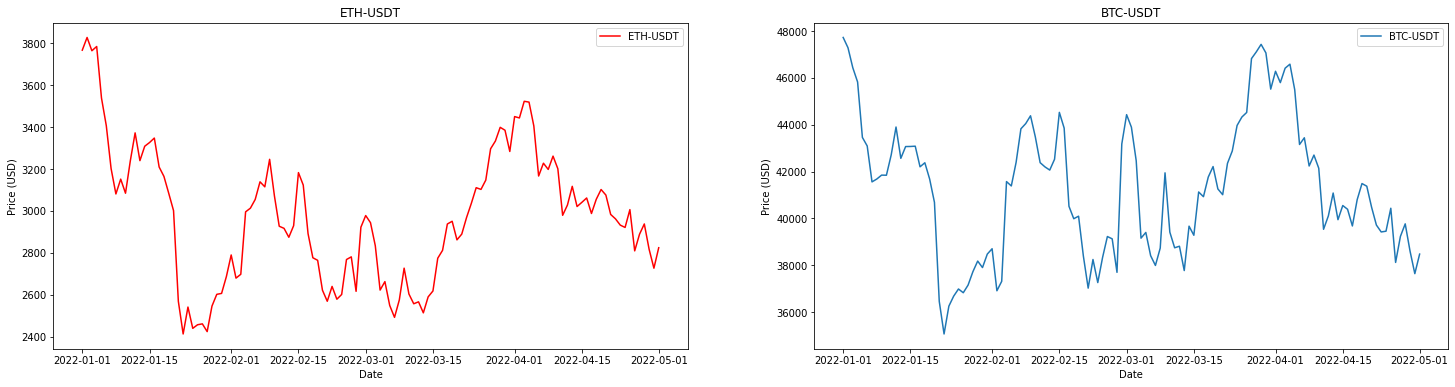

In [63]:
import matplotlib.pyplot as plt

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(25,6), sharex=True)

ax1.plot(df['close'],label="ETH-USDT", color="red")
ax1.set_title('ETH-USDT')
ax1.set_xlabel('Date')
ax1.set_ylabel('Price (USD)')
ax1.legend(loc="upper right")

ax2.plot(df1['close'],label="BTC-USDT")
ax2.set_title('BTC-USDT')
ax2.set_xlabel('Date')
ax2.set_ylabel('Price (USD)')
ax2.legend(loc="upper right")

plt.show()

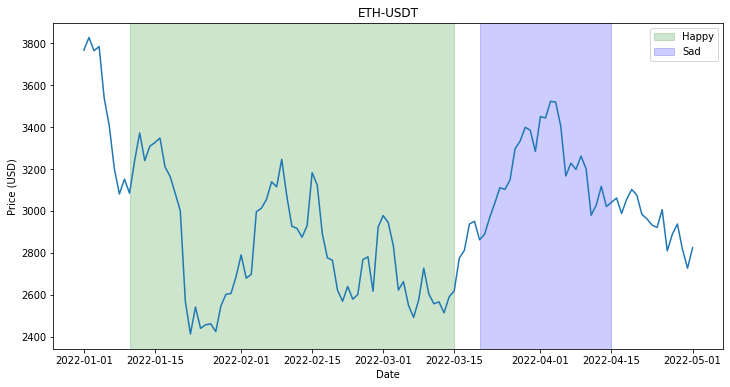

In [ ]:
import matplotlib.pyplot as plt

# Set the start and end dates for the time range to highlight
start_date = '2022-01-10'
end_date = '2022-03-15'

start_date1 = '2022-03-20'
end_date1 = '2022-04-15'

# Create a figure and an axis object
fig, ax = plt.subplots(figsize=(12,6))

# Plot the data on the axis object
ax.plot(df['close'])
ax.set_title('ETH-USDT')
ax.set_xlabel('Date')
ax.set_ylabel('Price (USD)')

# Use axvspan() to highlight the time range
ax.axvspan(start_date, end_date, color='green', alpha=0.2,label="Happy")
ax.axvspan(start_date1, end_date1, color='blue', alpha=0.2,label="Sad")

ax.legend()

# Show the plot
plt.show()

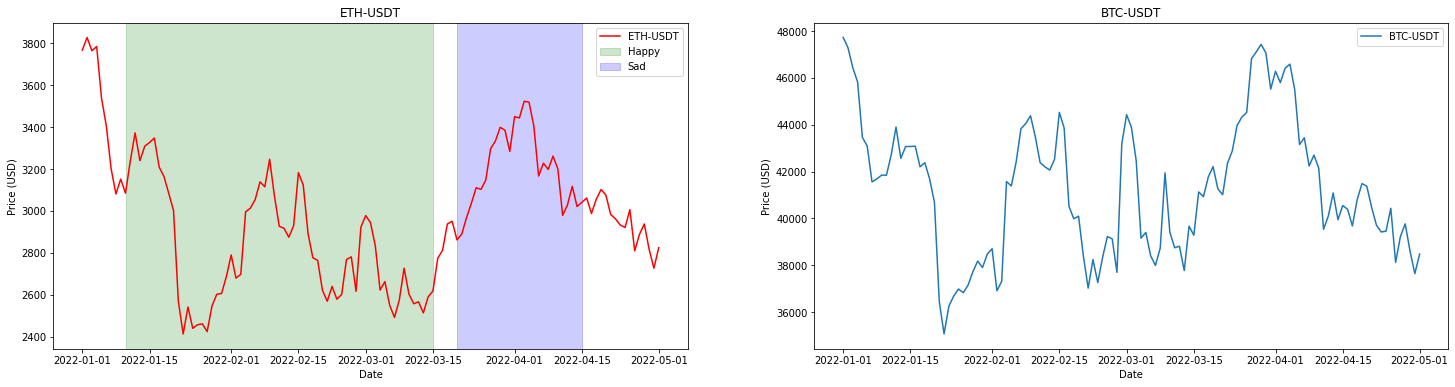

In [65]:
start_date = '2022-01-10'
end_date = '2022-03-15'

start_date1 = '2022-03-20'
end_date1 = '2022-04-15'

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(25,6), sharex=True)

ax1.plot(df['close'],label="ETH-USDT", color="red")
ax1.set_title('ETH-USDT')
ax1.set_xlabel('Date')
ax1.set_ylabel('Price (USD)')
# Use axvspan() to highlight the time range
ax1.axvspan(start_date, end_date, color='green', alpha=0.2,label="Happy")
ax1.axvspan(start_date1, end_date1, color='blue', alpha=0.2,label="Sad")
ax1.legend(loc="upper right")

ax2.plot(df1['close'],label="BTC-USDT")
ax2.set_title('BTC-USDT')
ax2.set_xlabel('Date')
ax2.set_ylabel('Price (USD)')
ax2.legend(loc="upper right")

# Show the plot
plt.show()